In [189]:
import pandas as pd
import numpy as np

# 读取文件数据

In [190]:
# 读取Excel文件
data = pd.read_excel('p1_data.xlsx')
data.head()

,ID,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,...,平均每次食用量.26,植物油,动物油,盐,酱油,醋,酱类,味精,身高,体重
0,10001,NaN,5.0,NaN,NaN,2.0,1.0,2.0,NaN,5.0,...,NaN,6.0,0.0,10.0,1.0,1.0,0.0,0.0,161.5,50.5
1,10002,NaN,7.0,NaN,NaN,NaN,3.0,5.0,NaN,NaN,...,2.0,7.0,0.0,15.0,1.0,1.0,5.0,0.0,166.0,48.5
2,10003,4.0,1.0,NaN,NaN,2.0,2.0,2.0,NaN,3.0,...,1.0,6.0,0.0,20.0,2.0,0.0,0.0,0.0,183.0,64.0
3,10004,NaN,7.0,NaN,NaN,NaN,3.0,3.0,NaN,7.0,...,0.5,8.0,0.0,6.0,1.0,1.0,0.0,0.0,177.2,78.5
4,10005,NaN,NaN,NaN,NaN,7.0,2.0,2.0,NaN,NaN,...,NaN,3.0,0.0,5.0,1.0,0.0,0.0,0.0,173.6,73.0


# 计算BMI指数

In [191]:
data['BMI'] = data['体重'] / ((data['身高']/100)**2)

In [192]:
data.head()

,ID,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,...,植物油,动物油,盐,酱油,醋,酱类,味精,身高,体重,BMI
0,10001,NaN,5.0,NaN,NaN,2.0,1.0,2.0,NaN,5.0,...,6.0,0.0,10.0,1.0,1.0,0.0,0.0,161.5,50.5,19.361827
1,10002,NaN,7.0,NaN,NaN,NaN,3.0,5.0,NaN,NaN,...,7.0,0.0,15.0,1.0,1.0,5.0,0.0,166.0,48.5,17.600523
2,10003,4.0,1.0,NaN,NaN,2.0,2.0,2.0,NaN,3.0,...,6.0,0.0,20.0,2.0,0.0,0.0,0.0,183.0,64.0,19.110753
3,10004,NaN,7.0,NaN,NaN,NaN,3.0,3.0,NaN,7.0,...,8.0,0.0,6.0,1.0,1.0,0.0,0.0,177.2,78.5,25.000127
4,10005,NaN,NaN,NaN,NaN,7.0,2.0,2.0,NaN,NaN,...,3.0,0.0,5.0,1.0,0.0,0.0,0.0,173.6,73.0,24.222748


# 删除 是否吃XX 中NaN的整行数据

In [193]:
# 指定要计算 value_counts() 的列的下标
column_indices = [22, -10, 5]

# 计算多个列的 value_counts()
value_counts = data.iloc[:, 22:-10:5].apply(pd.value_counts, dropna=False)
value_counts = value_counts.iloc[:3,:]
value_counts

,是否吃大米,是否吃小麦面粉,是否吃杂粮,是否吃薯类,是否吃油炸面食,是否吃猪肉,是否吃牛羊肉,是否吃禽肉,是否吃内脏类,是否吃水产类,...,是否吃干豆,是否吃新鲜蔬菜,是否吃海草类,是否吃咸菜,是否吃泡菜,是否吃酸菜,是否吃糕点,是否吃水果,是否吃果汁饮料,是否吃其他饮料
1.0,7697,6400,6053,6551,2699,7591,5375,7251,4313,7322,...,5060,7664,6051,4857,1977,3628,5668,7584,4420,3743
2.0,8,1292,1642,1152,5008,112,2326,453,3382,382,...,2632,43,1653,2849,5726,4076,2036,120,3276,3891
NaN,4,17,14,6,2,6,8,5,14,5,...,17,2,5,3,6,5,5,5,13,75


In [194]:
# 创建要删除的列的下标列表
delete_columns = data.columns[22:-10:5]
delete_columns
data.dropna(subset=delete_columns, inplace=True)
data

,ID,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,...,植物油,动物油,盐,酱油,醋,酱类,味精,身高,体重,BMI
0,10001,NaN,5.0,NaN,NaN,2.0,1.0,2.0,NaN,5.0,...,6.0,0.0,10.0,1.0,1.0,0.0,0.0,161.5,50.5,19.361827
1,10002,NaN,7.0,NaN,NaN,NaN,3.0,5.0,NaN,NaN,...,7.0,0.0,15.0,1.0,1.0,5.0,0.0,166.0,48.5,17.600523
2,10003,4.0,1.0,NaN,NaN,2.0,2.0,2.0,NaN,3.0,...,6.0,0.0,20.0,2.0,0.0,0.0,0.0,183.0,64.0,19.110753
3,10004,NaN,7.0,NaN,NaN,NaN,3.0,3.0,NaN,7.0,...,8.0,0.0,6.0,1.0,1.0,0.0,0.0,177.2,78.5,25.000127
4,10005,NaN,NaN,NaN,NaN,7.0,2.0,2.0,NaN,NaN,...,3.0,0.0,5.0,1.0,0.0,0.0,0.0,173.6,73.0,24.222748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7704,17705,5.0,NaN,NaN,NaN,2.0,2.0,4.0,NaN,7.0,...,10.0,0.0,10.0,1.0,0.0,5.0,0.5,159.0,59.0,23.337684
7705,17706,5.0,1.0,NaN,NaN,1.0,5.0,5.0,NaN,4.0,...,7.0,0.5,10.0,1.2,0.2,2.0,0.0,170.0,60.5,20.934256
7706,17707,NaN,6.0,NaN,NaN,1.0,5.0,8.0,NaN,7.0,...,7.0,0.0,20.0,2.0,0.0,10.0,0.0,158.5,62.0,24.679318
7707,17708,NaN,7.0,NaN,NaN,NaN,4.0,6.0,NaN,7.0,...,7.0,0.0,20.0,3.0,0.2,0.0,0.0,153.0,50.5,21.572899


# 统一食用频率的单位

In [195]:
new_data = data.iloc[:,22:-10]
# 循环处理每个数据集
for i in range(0, 5*27, 5):
    new_data.iloc[:, i:i+4].fillna(0,inplace = True)
    # 根据第一列的值，将后三列的值进行合并
    new_data.loc[new_data.iloc[:, i] == 1, new_data.iloc[:, i:i+4].columns[1] ] = new_data.iloc[:, i+1] * 365 + new_data.iloc[:, i+2] * 52 + new_data.iloc[:, i+3] * 12

columns_to_drop = []
for i in range(24,155,5):
    columns_to_drop.append(f'Unnamed: {i}')
    columns_to_drop.append(f'Unnamed: {i+1}')
new_data.drop(columns=columns_to_drop, axis=1, inplace=True)
new_data

C:\Users\shining3d\AppData\Local\Temp\ipykernel_26220\1732441163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.iloc[:, i:i+4].fillna(0,inplace = True)


,是否吃大米,食用大米的频率,平均每次食用量,是否吃小麦面粉,食用小麦面粉的频率,平均每次食用量.1,是否吃杂粮,食用杂粮的频率,平均每次食用量.2,是否吃薯类,...,平均每次食用量.23,是否吃水果,食用水果的频率,平均每次食用量.24,是否吃果汁饮料,食用果汁饮料的频率,平均每次食用量.25,是否吃其他饮料,食用其他饮料的频率,平均每次食用量.26
0,1.0,365.0,1.00,1.0,104.0,2.0,1.0,12.0,2.0,1.0,...,NaN,1.0,730.0,10.0,2.0,0.0,NaN,2.0,0.0,NaN
1,1.0,730.0,1.50,1.0,24.0,1.5,1.0,24.0,1.0,1.0,...,1.5,1.0,730.0,3.0,1.0,156.0,2.0,1.0,365.0,2.0
2,1.0,730.0,2.00,2.0,0.0,NaN,2.0,0.0,NaN,2.0,...,2.0,1.0,104.0,2.0,2.0,0.0,NaN,1.0,52.0,1.0
3,1.0,1095.0,1.50,1.0,104.0,4.0,1.0,52.0,2.0,1.0,...,2.0,1.0,365.0,2.0,2.0,0.0,NaN,1.0,156.0,0.5
4,1.0,365.0,1.50,1.0,104.0,2.0,2.0,0.0,NaN,2.0,...,NaN,1.0,104.0,1.0,1.0,365.0,2.0,2.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7704,1.0,730.0,1.50,2.0,0.0,NaN,1.0,12.0,2.5,1.0,...,1.0,1.0,365.0,3.0,2.0,0.0,NaN,2.0,0.0,NaN
7705,1.0,730.0,3.75,1.0,24.0,2.0,1.0,36.0,2.0,1.0,...,1.0,1.0,156.0,4.0,2.0,0.0,NaN,1.0,208.0,2.0
7706,1.0,730.0,2.25,1.0,52.0,1.0,1.0,52.0,2.0,1.0,...,1.0,1.0,260.0,2.0,2.0,0.0,NaN,1.0,12.0,1.0
7707,1.0,1095.0,0.75,1.0,3.6,0.5,1.0,2.4,5.0,1.0,...,3.0,1.0,104.0,2.0,2.0,0.0,NaN,2.0,0.0,NaN


# 合并处理后的数据

In [196]:
eat_data = data.iloc[:,:22]
eat_data = eat_data.join(new_data, how='outer')
eat_data = eat_data.join(data.iloc[:,-10:], how='outer')

In [197]:
eat_data

,ID,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,...,植物油,动物油,盐,酱油,醋,酱类,味精,身高,体重,BMI
0,10001,NaN,5.0,NaN,NaN,2.0,1.0,2.0,NaN,5.0,...,6.0,0.0,10.0,1.0,1.0,0.0,0.0,161.5,50.5,19.361827
1,10002,NaN,7.0,NaN,NaN,NaN,3.0,5.0,NaN,NaN,...,7.0,0.0,15.0,1.0,1.0,5.0,0.0,166.0,48.5,17.600523
2,10003,4.0,1.0,NaN,NaN,2.0,2.0,2.0,NaN,3.0,...,6.0,0.0,20.0,2.0,0.0,0.0,0.0,183.0,64.0,19.110753
3,10004,NaN,7.0,NaN,NaN,NaN,3.0,3.0,NaN,7.0,...,8.0,0.0,6.0,1.0,1.0,0.0,0.0,177.2,78.5,25.000127
4,10005,NaN,NaN,NaN,NaN,7.0,2.0,2.0,NaN,NaN,...,3.0,0.0,5.0,1.0,0.0,0.0,0.0,173.6,73.0,24.222748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7704,17705,5.0,NaN,NaN,NaN,2.0,2.0,4.0,NaN,7.0,...,10.0,0.0,10.0,1.0,0.0,5.0,0.5,159.0,59.0,23.337684
7705,17706,5.0,1.0,NaN,NaN,1.0,5.0,5.0,NaN,4.0,...,7.0,0.5,10.0,1.2,0.2,2.0,0.0,170.0,60.5,20.934256
7706,17707,NaN,6.0,NaN,NaN,1.0,5.0,8.0,NaN,7.0,...,7.0,0.0,20.0,2.0,0.0,10.0,0.0,158.5,62.0,24.679318
7707,17708,NaN,7.0,NaN,NaN,NaN,4.0,6.0,NaN,7.0,...,7.0,0.0,20.0,3.0,0.2,0.0,0.0,153.0,50.5,21.572899


In [198]:
eat_data.isnull().sum()

ID            0
不吃早餐       6171
在家吃早餐      1647
早餐带餐到单位    7340
单位食堂早餐     6679
           ... 
酱类          832
味精          712
身高            4
体重            4
BMI           4
Length: 113, dtype: int64

In [199]:
# 使用 isnull().sum() 计算每列的缺失值数量
missing_values = eat_data.isnull().sum()

# 创建一个新的 DataFrame，包含列名和缺失值数量
result_df = pd.DataFrame({'列名': missing_values.index, '缺失值数量': missing_values.values})

# 将结果保存到 txt 文件中，使用 tab 分隔符
result_df.to_csv('missing_values.txt', sep='\t', index=False)

# 绘图

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [201]:
heatmap_data = data.iloc[:, 1:]

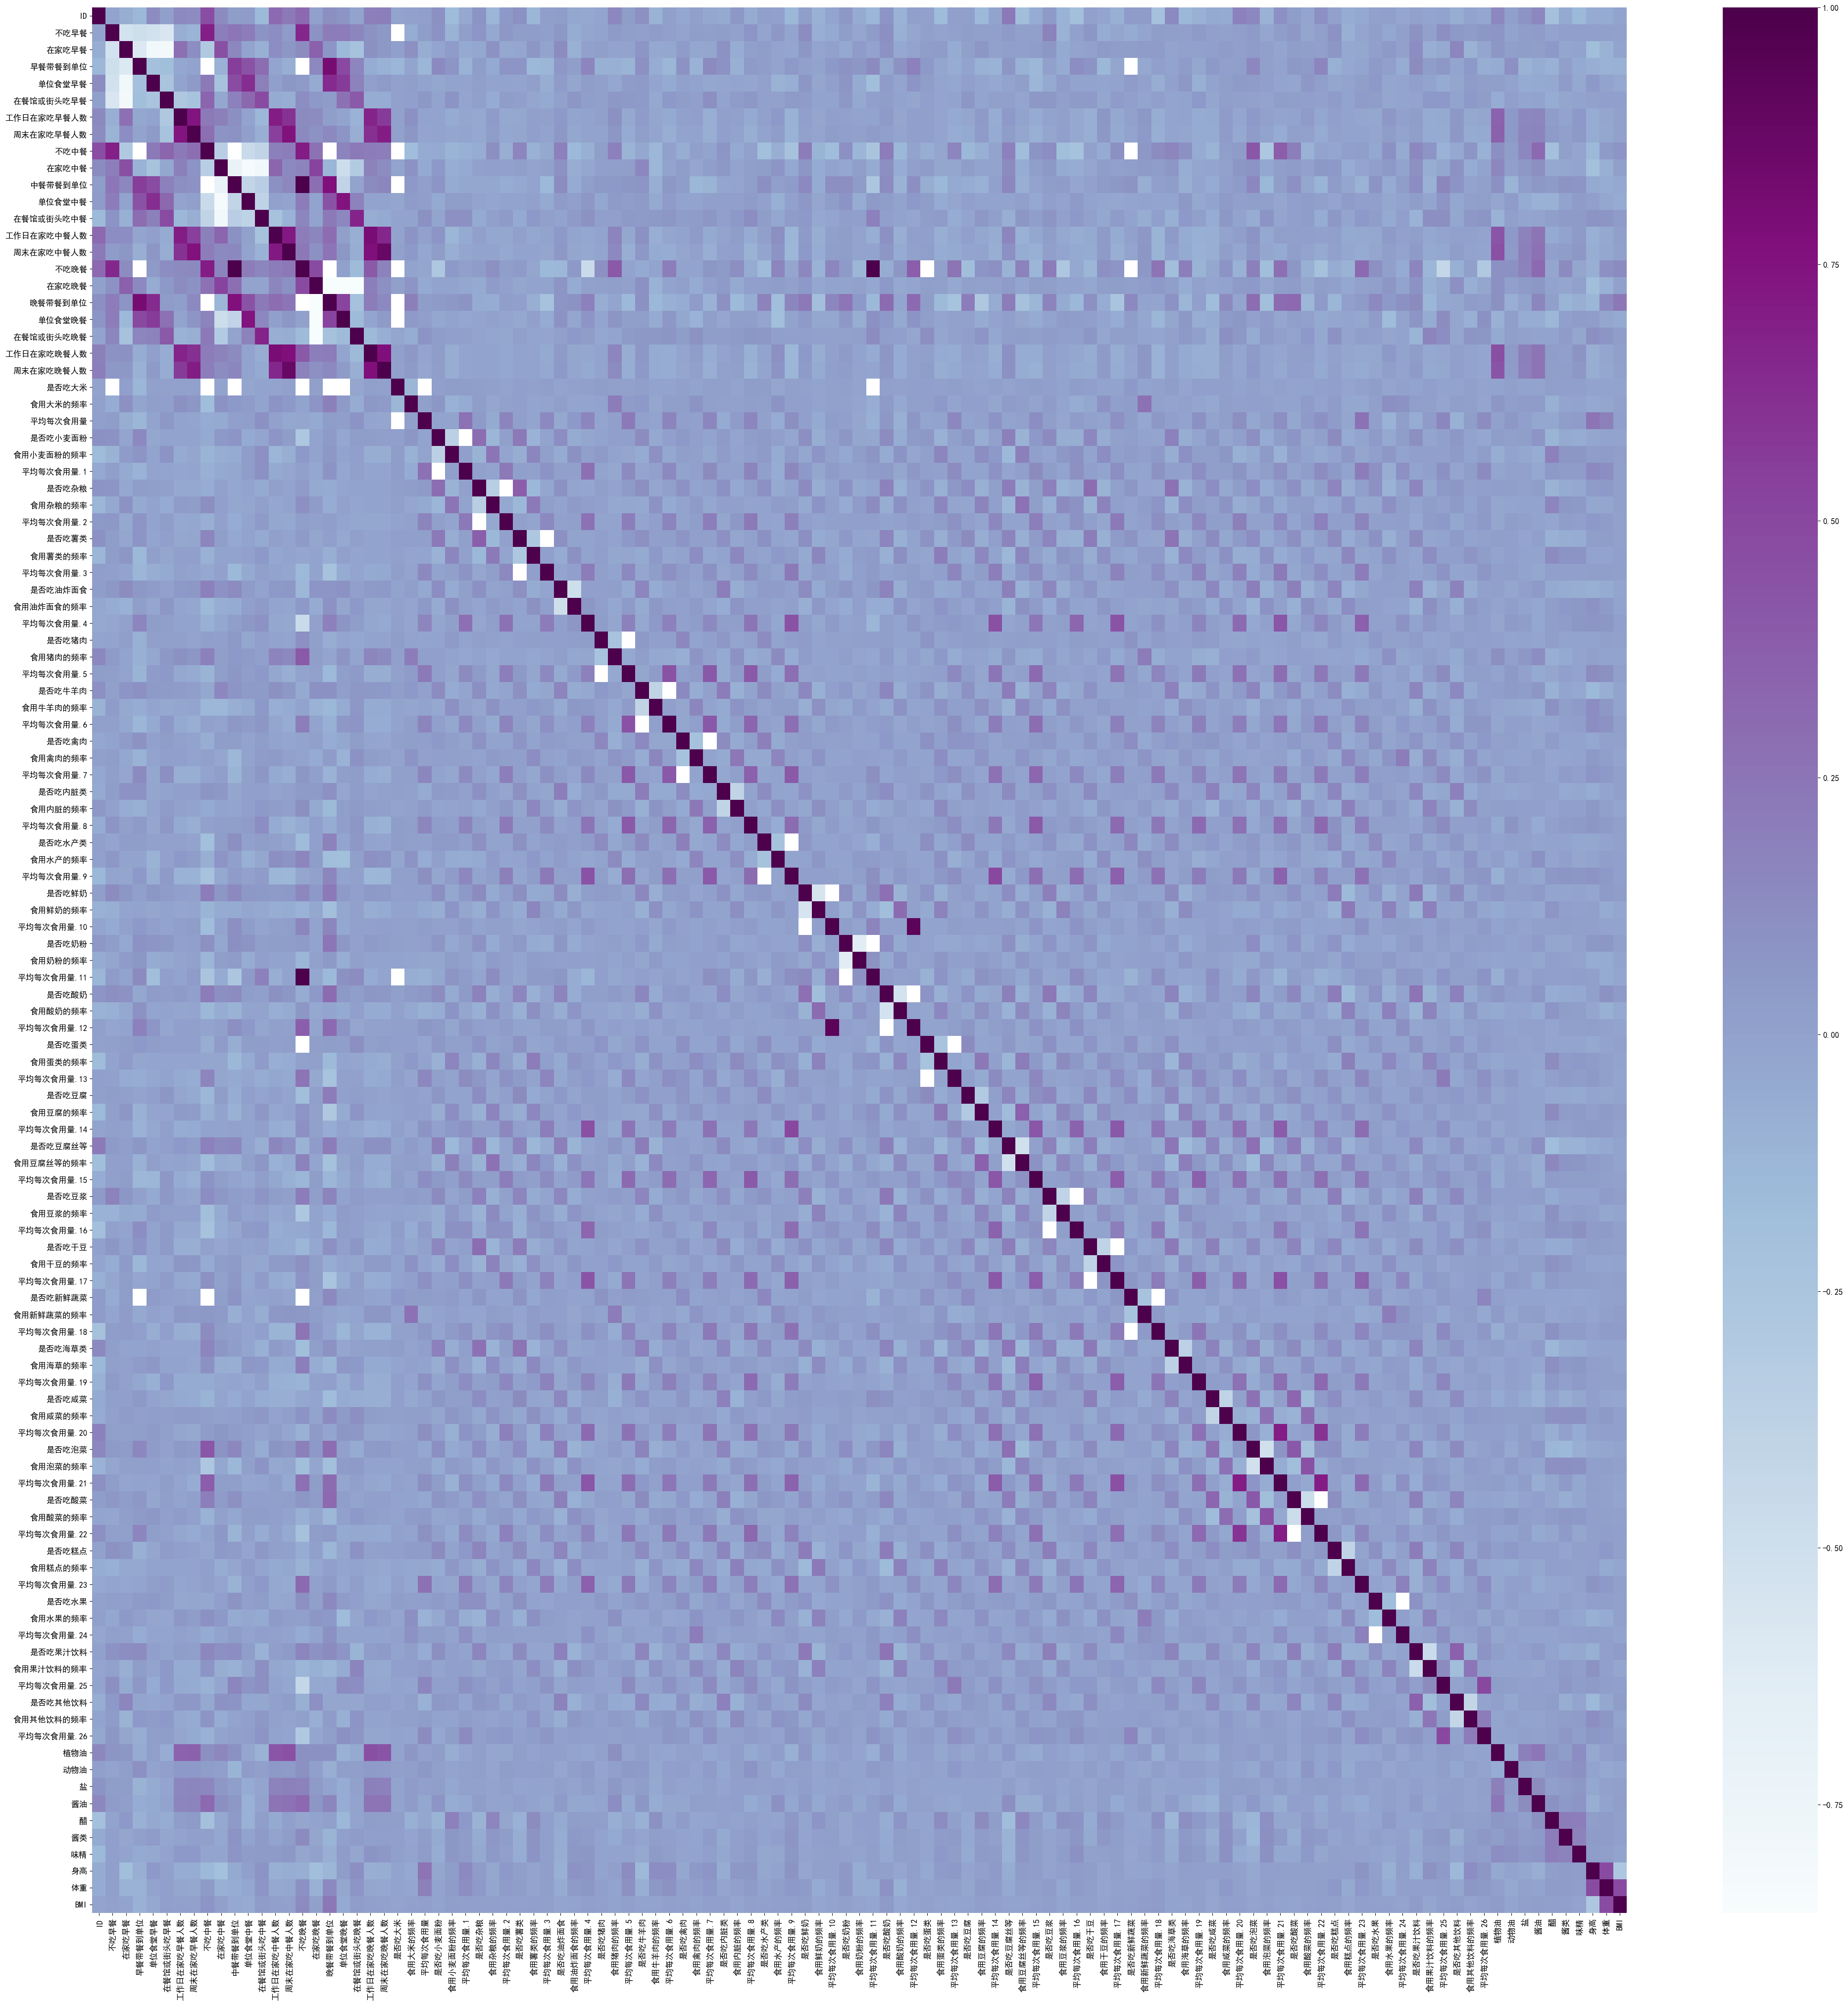

In [233]:
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False
# 绘制热力图
plt.figure(figsize=(50,50))
sns.heatmap(eat_data.corr(),cmap='BuPu',annot=False)
plt.show()

<Figure size 640x480 with 0 Axes>

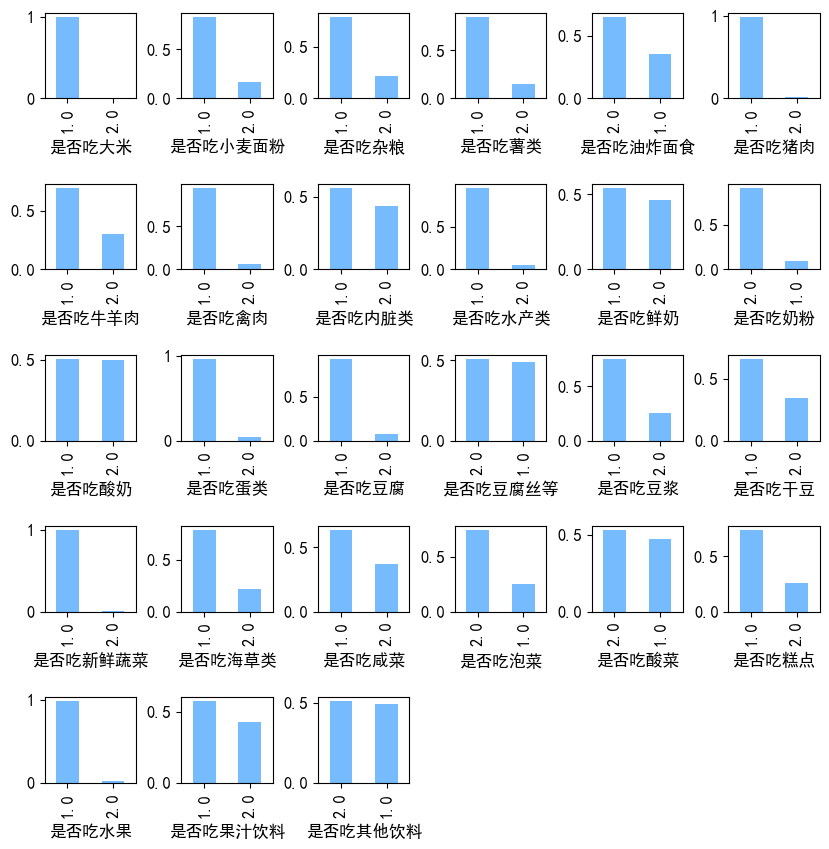

In [231]:
plt.figure(1) 
fig, axs = plt.subplots(5, 6, figsize=(10, 10), sharex=False)
fig.subplots_adjust(hspace=1, wspace=0.5)
plt.rcParams['font.size'] = 12
plt.subplot(5,6,1)
eat_data['是否吃大米'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,2)
eat_data['是否吃小麦面粉'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,3)
eat_data['是否吃杂粮'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,4)
eat_data['是否吃薯类'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,5)
eat_data['是否吃油炸面食'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,6)
eat_data['是否吃猪肉'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,7)
eat_data['是否吃牛羊肉'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,8)
eat_data['是否吃禽肉'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,9)
eat_data['是否吃内脏类'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,10)
eat_data['是否吃水产类'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,11)
eat_data['是否吃鲜奶'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,12)
eat_data['是否吃奶粉'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,13)
eat_data['是否吃酸奶'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,14)
eat_data['是否吃蛋类'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,15)
eat_data['是否吃豆腐'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,16)
eat_data['是否吃豆腐丝等'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,17)
eat_data['是否吃豆浆'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,18)
eat_data['是否吃干豆'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,19)
eat_data['是否吃新鲜蔬菜'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,20)
eat_data['是否吃海草类'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,21)
eat_data['是否吃咸菜'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,22)
eat_data['是否吃泡菜'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,23)
eat_data['是否吃酸菜'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,24)
eat_data['是否吃糕点'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,25)
eat_data['是否吃水果'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,26)
eat_data['是否吃果汁饮料'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
plt.subplot(5,6,27)
eat_data['是否吃其他饮料'].value_counts(normalize=True).plot.bar(figsize=(10,10),color='#75bbfd')
# 隐藏多余的子图
for i in range(27, 30):
    axs.flat[i].axis('off')

C:\Users\shining3d\AppData\Local\Temp\ipykernel_26220\10516833.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(eat_data['食用大米的频率'])
C:\Users\shining3d\AppData\Local\Temp\ipykernel_26220\10516833.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(eat_data['食用小麦面粉的频率'])
C:\Users\shining3d\App

<Axes: xlabel='食用其他饮料的频率', ylabel='Density'>

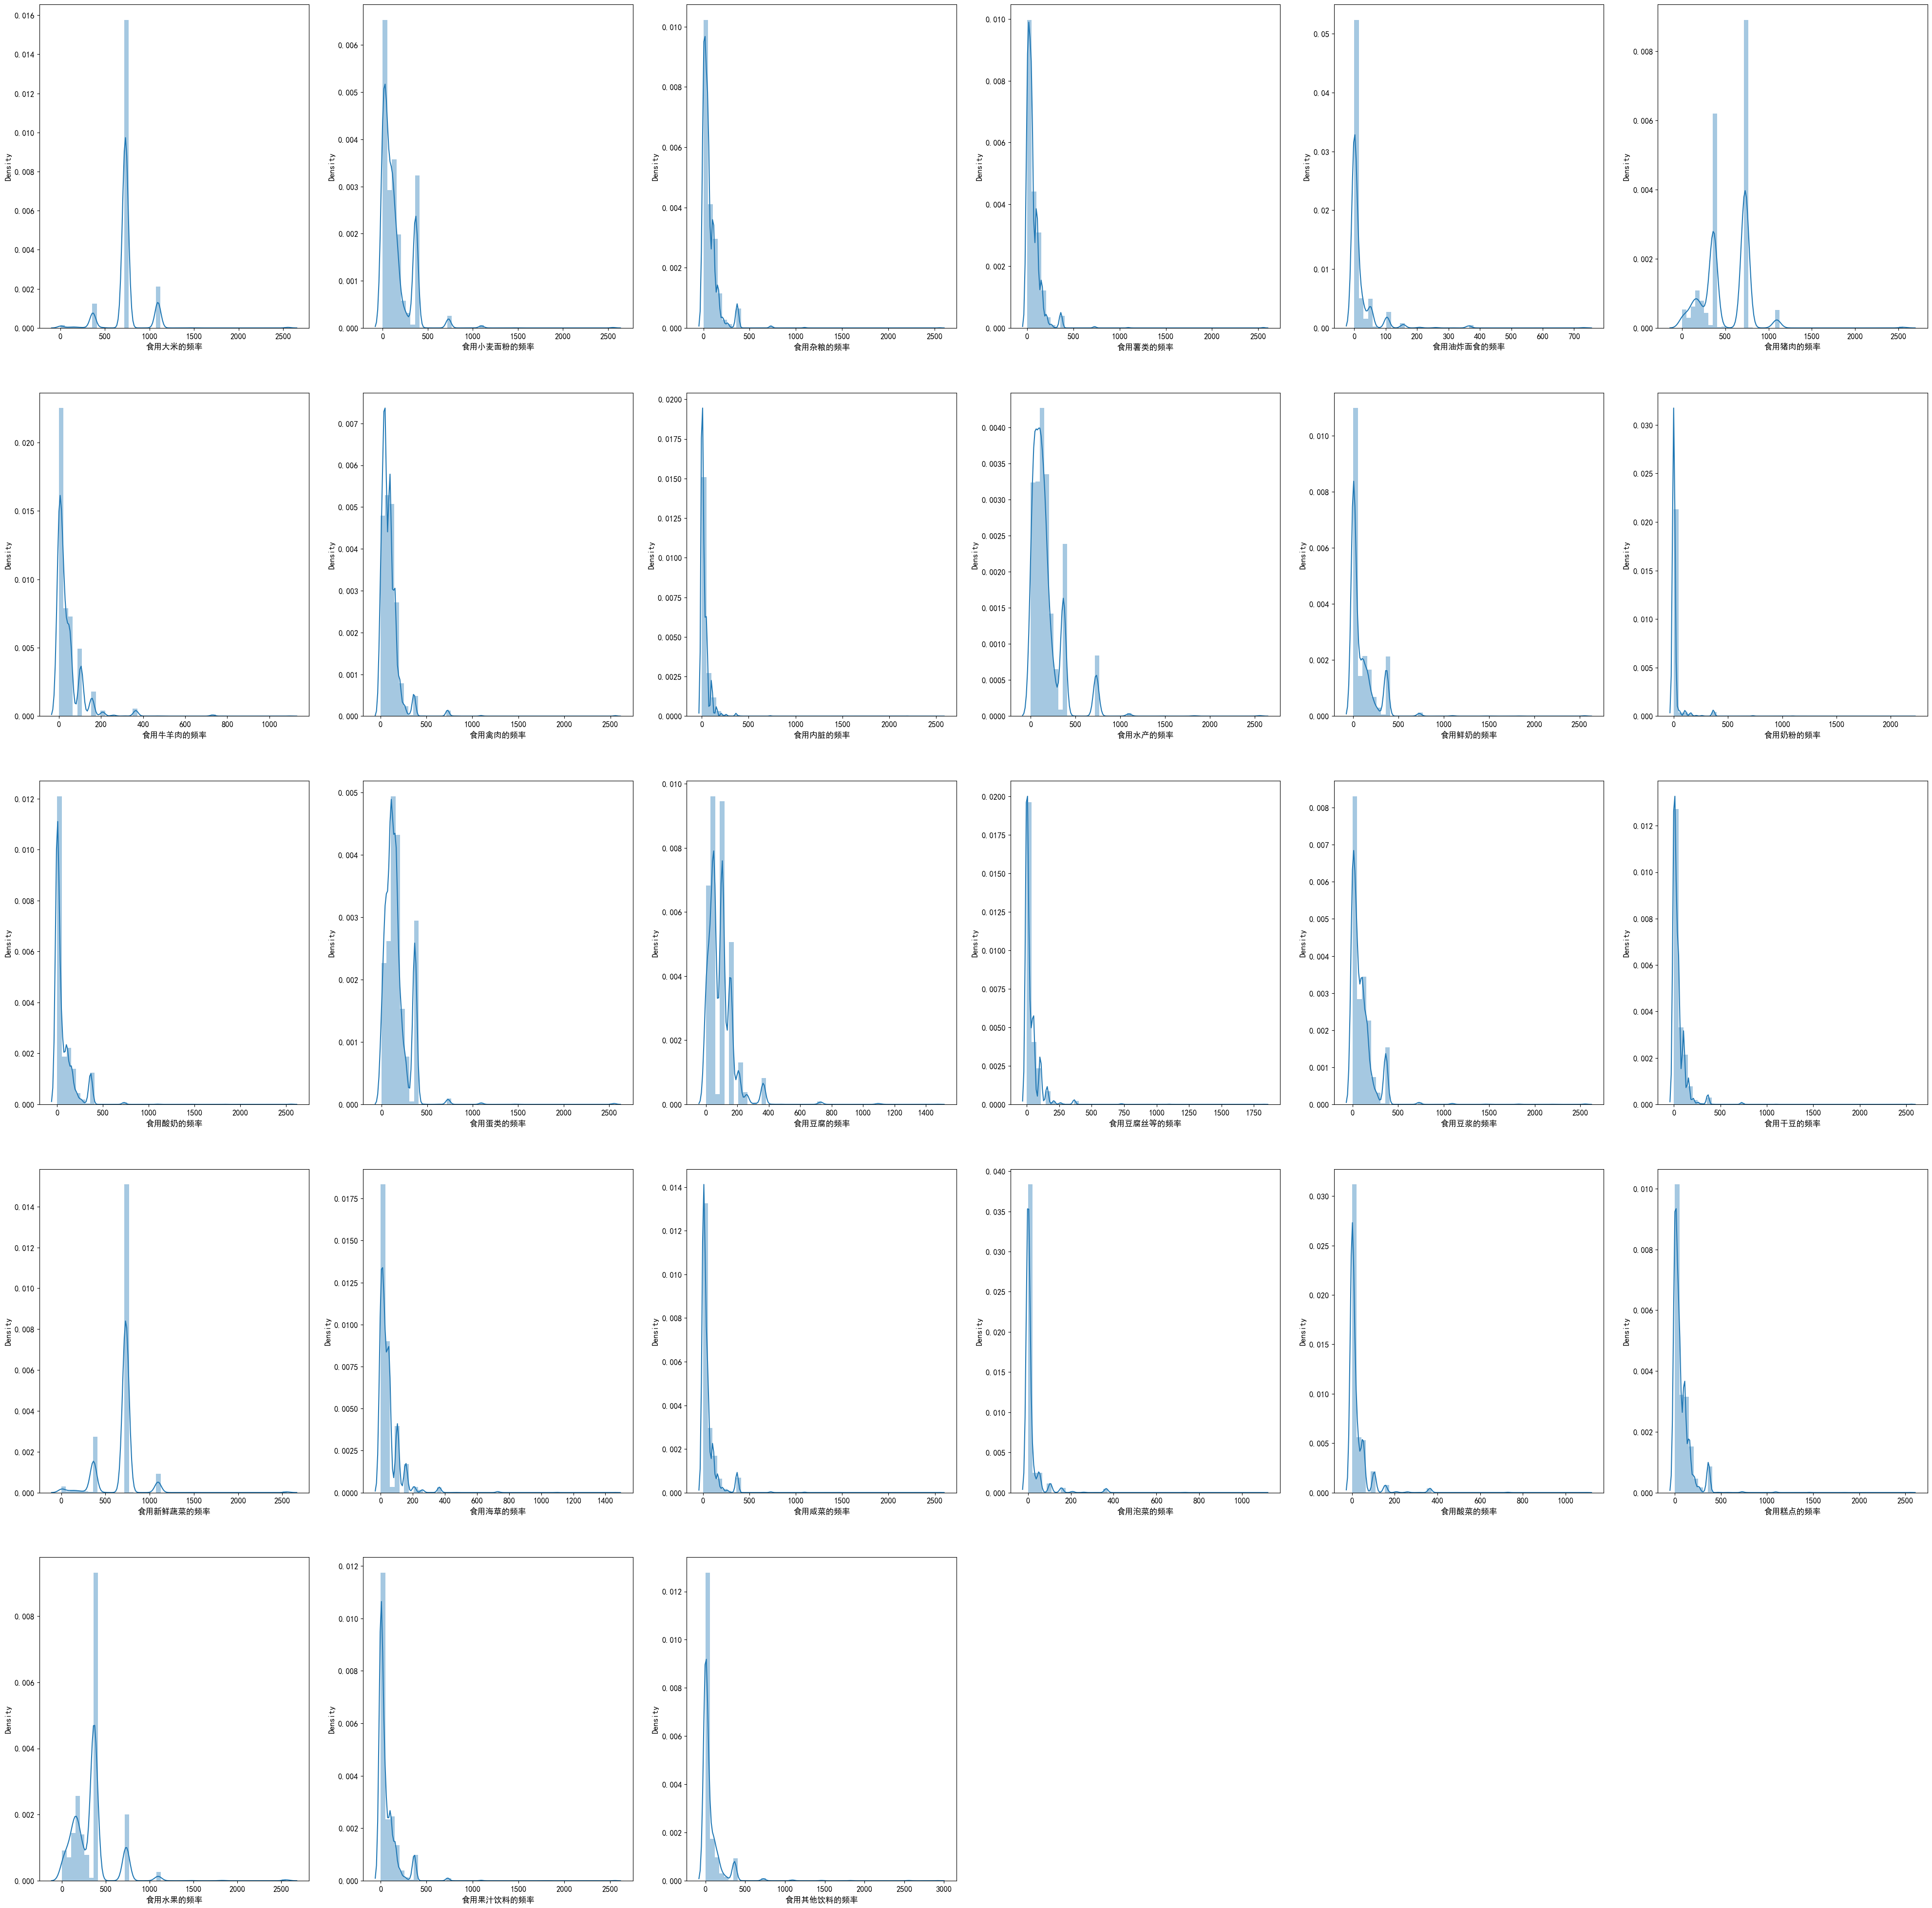

In [238]:
plt.figure(1,figsize=(50,50))
plt.subplot(5,6,1)
sns.distplot(eat_data['食用大米的频率'])
plt.subplot(5,6,2)
sns.distplot(eat_data['食用小麦面粉的频率'])
plt.subplot(5,6,3)
sns.distplot(eat_data['食用杂粮的频率'])
plt.subplot(5,6,4)
sns.distplot(eat_data['食用薯类的频率'])
plt.subplot(5,6,5)
sns.distplot(eat_data['食用油炸面食的频率'])
plt.subplot(5,6,6)
sns.distplot(eat_data['食用猪肉的频率'])
plt.subplot(5,6,7)
sns.distplot(eat_data['食用牛羊肉的频率'])
plt.subplot(5,6,8)
sns.distplot(eat_data['食用禽肉的频率'])
plt.subplot(5,6,9)
sns.distplot(eat_data['食用内脏的频率'])
plt.subplot(5,6,10)
sns.distplot(eat_data['食用水产的频率'])
plt.subplot(5,6,11)
sns.distplot(eat_data['食用鲜奶的频率'])
plt.subplot(5,6,12)
sns.distplot(eat_data['食用奶粉的频率'])
plt.subplot(5,6,13)
sns.distplot(eat_data['食用酸奶的频率'])
plt.subplot(5,6,14)
sns.distplot(eat_data['食用蛋类的频率'])
plt.subplot(5,6,15)
sns.distplot(eat_data['食用豆腐的频率'])
plt.subplot(5,6,16)
sns.distplot(eat_data['食用豆腐丝等的频率'])
plt.subplot(5,6,17)
sns.distplot(eat_data['食用豆浆的频率'])
plt.subplot(5,6,18)
sns.distplot(eat_data['食用干豆的频率'])
plt.subplot(5,6,19)
sns.distplot(eat_data['食用新鲜蔬菜的频率'])
plt.subplot(5,6,20)
sns.distplot(eat_data['食用海草的频率'])
plt.subplot(5,6,21)
sns.distplot(eat_data['食用咸菜的频率'])
plt.subplot(5,6,22)
sns.distplot(eat_data['食用泡菜的频率'])
plt.subplot(5,6,23)
sns.distplot(eat_data['食用酸菜的频率'])
plt.subplot(5,6,24)
sns.distplot(eat_data['食用糕点的频率'])
plt.subplot(5,6,25)
sns.distplot(eat_data['食用水果的频率'])
plt.subplot(5,6,26)
sns.distplot(eat_data['食用果汁饮料的频率'])
plt.subplot(5,6,27)
sns.distplot(eat_data['食用其他饮料的频率'])